# **GroupAssignment_OptimizationMethods : Developing and Solving Special Problems in Linear Programming**

In [ ]:
%%capture
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

In [ ]:
from pyomo.environ import *

# Problem 1

The ProExpert Company is producing highchairs in its three production facilities and ships the highchairs to four distribution centers. Production facilities 1, 2, and 3 produce 12, 17, and 11 shipments per month, respectively. Each distribution center needs to receive 10 shipments per month. The distance from each plant to the respective distributing centers is given below:

 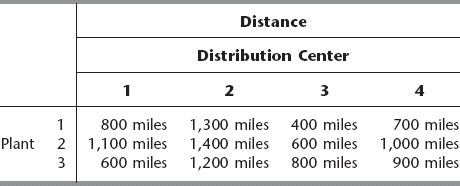

The freight cost for each shipment is $100 plus 50 cents per mile.
Formulate this problem as a transportation problem by constructing the appropriate parameter table.
How much should be shipped from each plant to each of the distribution centers to minimize the total shipping cost?

In [ ]:
# Create a model
model = ConcreteModel()

plant = ['1', '2', '3'] # plants

dc = ['1', '2', '3', '4'] # dc = Distribution Center

# declare variables
model.x = Var(plant,dc, domain=NonNegativeReals)

# objective function # Minimize sum of shipping cost of highchairs from plant to distribution centres Σxij
model.shippingcost = Objective(expr = (100+(0.5*800))*model.x[plant[0], dc[0]] + (100+(0.5*1300))*model.x[plant[0], dc[1]] + (100+(0.5*400))*model.x[plant[0], dc[2]] + (100+(0.5*700))*model.x[plant[0], dc[3]] +
                                     (100+(0.5*1100))*model.x[plant[1], dc[0]] + (100+(0.5*1400))*model.x[plant[1], dc[1]] + (100+(0.5*600))*model.x[plant[1], dc[2]] + (100+(0.5*1000))*model.x[plant[1], dc[3]] +
                                      (100+(0.5*600))*model.x[plant[2], dc[0]] + (100+(0.5*1200))*model.x[plant[2], dc[1]] + (100+(0.5*800))*model.x[plant[2], dc[2]] + (100+(0.5*900))*model.x[plant[2], dc[3]], sense=minimize)

#constraints # Qty of highchairs shipped from plant to distribution centre
model.plant1 = Constraint(expr = model.x[plant[0], dc[0]] + model.x[plant[0], dc[1]] + model.x[plant[0], dc[2]] + model.x[plant[0], dc[3]] == 12) # Qty of highchairs shipped from plant 1 to distribution centres
model.plant2 = Constraint(expr = model.x[plant[1], dc[0]] + model.x[plant[1], dc[1]] + model.x[plant[1], dc[2]] + model.x[plant[1], dc[3]] == 17) # Qty of highchairs shipped from plant 2 to distribution centres
model.plant3 = Constraint(expr = model.x[plant[2], dc[0]] + model.x[plant[2], dc[1]] + model.x[plant[2], dc[2]] + model.x[plant[2], dc[3]] == 11) # Qty of highchairs shipped from plant 3 to distribution centres

model.distribution1 = Constraint(expr = model.x[plant[0], dc[0]] + model.x[plant[1], dc[0]] + model.x[plant[2], dc[0]] == 10) # Demand in distribution centre 1
model.distribution2 = Constraint(expr = model.x[plant[0], dc[1]] + model.x[plant[1], dc[1]] + model.x[plant[2], dc[1]] == 10) # Demand in distribution centre 2
model.distribution3 = Constraint(expr = model.x[plant[0], dc[2]] + model.x[plant[1], dc[2]] + model.x[plant[2], dc[2]] == 10) # Demand in distribution centre 3
model.distribution4 = Constraint(expr = model.x[plant[0], dc[3]] + model.x[plant[1], dc[3]] + model.x[plant[2], dc[3]] == 10) # Demand in distribution centre 4

#Solve
results = SolverFactory('glpk').solve(model)
results.write()
model.pprint()

# Display Solution
print ('\nShipments from Plant to Distribution Center: \n')

print('\nMinimized shipping cost of highchairs from plants to distribution centres (Z) = ', model.shippingcost())

for i in plant:
  for j in dc:
    print('\nShipment Quantity from Plant ', i, 'to Distribution Centre ',j, ':', model.x[i, j]())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 20200.0
  Upper bound: 20200.0
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 12
  Number of nonzeros: 24
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.010953426361083984
# ----------------------------------------------------------
#   Solution Information
# ------------------------------

#Problem 2

The M&Com Company has two plants producing Computed Tomography (CT) machines that then are shipped to three distribution centers. The production costs are the same at the two plants, and the cost of shipping for each CT-machine is shown for each combination of plant and distribution center:

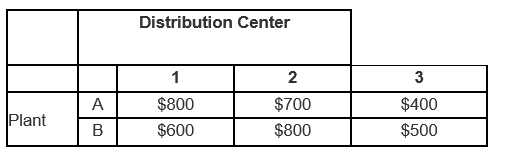

Each plant can produce and ship any amount up to a maximum of 50 CT-machines per week, so there is considerable flexibility on how to divide the total production between the two plants so as to reduce shipping costs. However, each distribution center must receive exactly 20 CT-machines per week.
Management's objective is to determine how many CT-machines should be produced at each plant, and then what the overall shipping pattern should be to minimize total shipping cost.
(a) Formulate this problem as a transportation problem by constructing the appropriate parameter table.
(b) Solve the transportation problem using pyomo.


In [ ]:
# Create a model
model = ConcreteModel()

plant = ['A', 'B']

dc = ['1', '2', '3', '4'] # dc = Distribution Center where 4 is a dummy distribution centre

# declare variables
model.x = Var(plant,dc, domain=NonNegativeReals)

# objective function # Minimize sum of shipping cost of highchairs from plants to distribution centres Σxij
model.shippingcost = Objective(expr = 800*model.x[plant[0], dc[0]] + 700*model.x[plant[0], dc[1]] + 400*model.x[plant[0], dc[2]] + 0*model.x[plant[0], dc[3]] +
                                      600*model.x[plant[1], dc[0]] + 800*model.x[plant[1], dc[1]] + 500*model.x[plant[1], dc[2]] + 0*model.x[plant[1], dc[3]], sense=minimize)

#constraints
model.plantA = Constraint(expr = model.x[plant[0], dc[0]] + model.x[plant[0], dc[1]] + model.x[plant[0], dc[2]] + model.x[plant[0], dc[3]] == 50) # Qty of highchairs shipped from plant A to distribution centres
model.plantB = Constraint(expr = model.x[plant[1], dc[0]] + model.x[plant[1], dc[1]] + model.x[plant[1], dc[2]] + model.x[plant[1], dc[3]] == 50) # Qty of highchairs shipped from plant B to distribution centres

model.distribution1 = Constraint(expr = model.x[plant[0], dc[0]] + model.x[plant[1], dc[0]] == 20) # Demand in distribution centre 1
model.distribution2 = Constraint(expr = model.x[plant[0], dc[1]] + model.x[plant[1], dc[1]] == 20) # Demand in distribution centre 2
model.distribution3 = Constraint(expr = model.x[plant[0], dc[2]] + model.x[plant[1], dc[2]] == 20) # Demand in distribution centre 3
model.distribution4 = Constraint(expr = model.x[plant[0], dc[3]] + model.x[plant[1], dc[3]] == 40) # Demand in dummy distribution centre 4

#Solve
results = SolverFactory('glpk').solve(model)
results.write()
model.pprint()

# Display Solution
print ('\nProduction Quantity at Plant for Distribution Center: \n')

print('\nMinimized shipping cost of CT machines from plants to distribution centres (Z) = ', model.shippingcost())

for i in plant:
  for j in dc:
    print('\nShipment Quantity from Plant ', i, 'to Distrbution Centre ', j, ':', model.x[i, j]())

print('\nIt should be noted as mentioned earlier that distribution centre 4 is a dummy distribution centre and hence should not be considered')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 34000.0
  Upper bound: 34000.0
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 8
  Number of nonzeros: 16
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.004200458526611328
# ----------------------------------------------------------
#   Solution Information
# -------------------------------